In [52]:
import sympy as syms
import numpy as np
import math

from sympy import * # For basic mathematical operations
syms.init_printing()
from sympy import symbols
from sympy import Matrix
from sympy.matrices import eye, zeros, ones, Identity # Special matrices (eye creates explicit matrix, Identity creates matrix expression)
from sympy import latex
from sympy import solve
from sympy import trigsimp # For simplifying trigonometric identities
from sympy.simplify.fu import fu # For simplifying trigonometric identities (Hongguang Fu's Trigonometric Simplification)
from sympy import Function # For expressing functions of time
from sympy import expand, factor # For expanding/factoring expressions
from sympy import Eq # For writing equations

# System Description

![sys](Images/DoublePendulum.jpg)

Both pendulum bobs are considered to be point masses with the same masses. The lengths of the pendulum are also considered to be the same. There is an excitation provided to the system as a result of which the system shows a translational motion $s(t)$ which is independent of the generalised coordinates and modelled as a constraint. The generalised coordinates are taken as $\gamma_{1}$ and $\gamma_{2}$ and the equilibrium points are null.



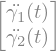

In [49]:
m,g,l,t = symbols('m g L t')
s = Function('s')
s = s(t)
sdd = Function('\ddot{s}')
sdd = sdd(t)
a1 = Function('\gamma_1')
a1 = a1(t)
a2 = Function('\gamma_2')
a2 = a2(t)
a1d = Function('\dot{\gamma_1}')
a1d = a1d(t)
a2d = Function('\dot{\gamma_2}')
a2d = a2d(t)
a1dd = Function('\ddot{\gamma_1}')
a1dd = a1dd(t)
a2dd = Function('\ddot{\gamma_2}')
a2dd = a2dd(t)
x = Matrix([[a1],[a2]])
xd = Matrix([[a1d],[a2d]])
xdd = Matrix([[a1dd],[a2dd]])
xdd

## Linearised Dynamics of the System

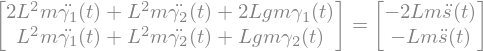

In [69]:
# Matrix of Inertial Forces
M = (m*l**2)*Matrix([[2,1],[1,1]])
# Matrix of Velocity Dependent Forces
P = zeros(xdd.shape[0])
# Matrix of Position Dependent Forces
Q = (m*g*l)*Matrix([[2,0],[0,1]])
# Excitation Matrix
h = -(m*l)*Matrix([[2*sdd],[sdd]])

linEq = Eq(M*xdd + P*xd + Q*x,h)
linEq

## State Space Representation

### System Matrix

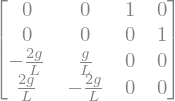

In [64]:
A = Matrix([[zeros(xdd.shape[0]),eye(xdd.shape[0])],[-(M**(-1))*Q,-(M**(-1))*P]])
A

### State Vector

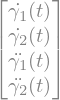

In [67]:
w = Matrix([[x],[xd]])
wd = Matrix([[xd],[xdd]])
wd

### Excitation Vector


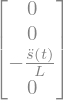

In [68]:
b = Matrix([[zeros(x.shape[0],1)],[(M**(-1))*h]])
b

### State Space Equation


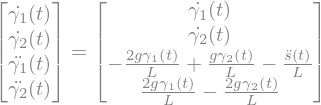

In [70]:
ssEq = Eq(wd,A*w + b)
ssEq